# Data Analysis with Python

## Objectives

After completing this lab you will be able to:

*   Explore features or charecteristics to predict price of car


<h3>What are the main characteristics that have the most impact on the car price?</h3>


<h2 id='import_data'>1. Import Data from Module 2</h2>


In [2265]:
import pandas as pd
import numpy as np

In [2266]:
path = 'clean_df.csv'
df = pd.read_csv(path, header=0)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,std-aspiration,turbo-aspiration,std-aspiration.1,turbo-aspiration.1,std-aspiration.2,turbo-aspiration.2,std-aspiration.3,turbo-aspiration.3,std-aspiration.4,turbo-aspiration.4
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,True,False,True,False,True,False,True,False,True,False
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,True,False,True,False,True,False,True,False,True,False
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,True,False,True,False,True,False,True,False,True,False
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,True,False,True,False,True,False,True,False,True,False
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,True,False,True,False,True,False,True,False,True,False


<h2 id='pattern_visualization'>2. Analyzing Individual Feature Patterns Using Visualization</h2>


Import visualization packages 'Matplotlib' and 'Seaborn'. Don't forget about '%matplotlib inline' to plot in a Jupyter notebook.


In [2267]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h4>How to choose the right visualization method?</h4>
<p>When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.</p>


In [2268]:
df.dtypes

symboling               int64
normalized-losses       int64
make                   object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int64
peak-rpm              float64
city-mpg                int64
highway-km            float64
price                 float64
city-km               float64
horsepower-binned      object
fuel-type-diesel         bool
fuel-type-gas            bool
std-aspiration           bool
turbo-aspiration         bool
std-aspiration.1         bool
turbo-aspiration.1       bool
std-aspiration.2         bool
turbo-aspi

<div class='alert alert-danger alertdanger' style='margin-top: 20px'>
<h3>Question  #1:</h3>

<b>What is the data type of the column 'peak-rpm'? </b>

</div>


In [2269]:
df['peak-rpm'].dtypes

dtype('float64')

**Correlation** measures how much two variables are related — in other words, whether one tends to increase/decrease when the other also increases/decreases.

When you use df.corr() on a Pandas DataFrame, it calculates the correlation between all numeric columns and returns a correlation matrix.

Possible values:

+1 → perfect positive correlation (if one increases, the other increases in the same proportion).

0 → no correlation (no clear linear relationship).

-1 → perfect negative correlation (if one increases, the other decreases in the same proportion).

For example, we can calculate the correlation between variables  of type 'int64' or 'float64' using the method 'corr':


In [2270]:
df.corr

<bound method DataFrame.corr of      symboling  normalized-losses         make num-of-doors   body-style  \
0            3                122  alfa-romero          two  convertible   
1            3                122  alfa-romero          two  convertible   
2            1                122  alfa-romero          two    hatchback   
3            2                164         audi         four        sedan   
4            2                164         audi         four        sedan   
..         ...                ...          ...          ...          ...   
196         -1                 95        volvo         four        sedan   
197         -1                 95        volvo         four        sedan   
198         -1                 95        volvo         four        sedan   
199         -1                 95        volvo         four        sedan   
200         -1                 95        volvo         four        sedan   

    drive-wheels engine-location  wheel-base    length 

<div class='alert alert-danger alertdanger' style='margin-top: 20px'>
<h3> Question  #2: </h3>

<p>Find the correlation between the following columns: bore, stroke, compression-ratio, and horsepower.</p>
<p>Hint: if you would like to select those columns, use the following syntax: df[['bore','stroke','compression-ratio','horsepower']]</p>
</div>


In [2271]:
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187923,0.098322
compression-ratio,0.001263,0.187923,1.000000,-0.214489
horsepower,0.566903,0.098322,-0.214489,1.000000


<h2>Continuous Numerical Variables:</h2> 

<p>Continuous numerical variables are variables that may contain any value within some range. They can be of type 'int64' or 'float64'. A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between an individual variable and the price, we can use 'regplot' which plots the scatterplot plus the fitted regression line for the data.</p>


Let's see several examples of different linear relationships:


<h3>Positive Linear Relationship</h4>


Let's find the scatterplot of 'engine-size' and 'price'.


(0.0, 53525.59143432051)

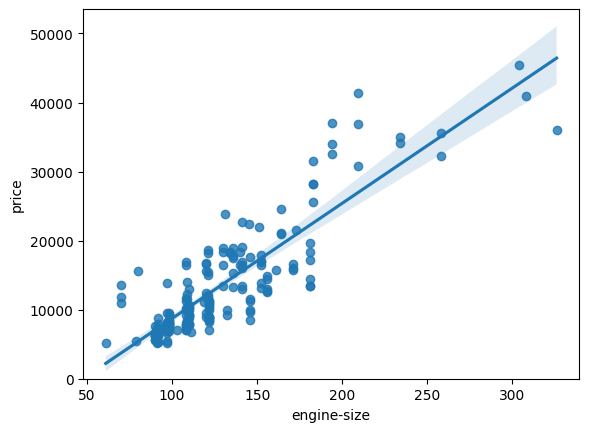

In [2272]:
sns.regplot(x='engine-size', y='price', data=df)
plt.ylim(0,)

<p>As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.</p>

We can examine the correlation between 'engine-size' and 'price' and see that it's approximately 0.87.


In [2273]:
df[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


Highway mpg is a potential predictor variable of price. Let's find the scatterplot of 'city-mpg' and 'price'.


<Axes: xlabel='city-mpg', ylabel='price'>

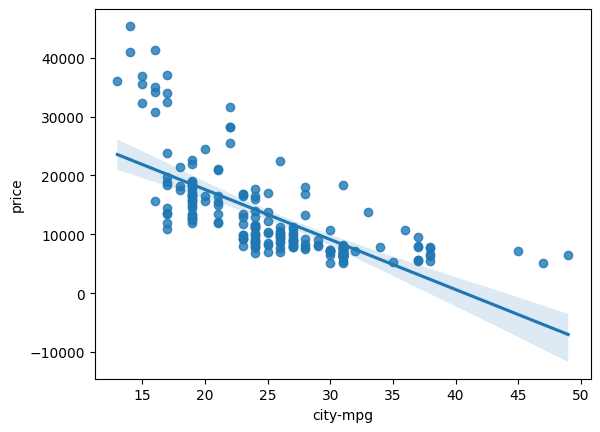

In [2274]:
sns.regplot(x='city-mpg', y='price', data=df)

<p>As city-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.</p>


We can examine the correlation between 'city-mpg' and 'price' and see it's approximately -0.704.


In [2275]:
df[['city-mpg', 'price']].corr()

,city-mpg,price
city-mpg,1.000000,-0.686571
price,-0.686571,1.000000


 <div class='alert alert-danger alertdanger' style='margin-top: 20px'>
<h1> Question  3 a): </h1>

<p>Find the correlation  between x='stroke' and y='price'.</p>
<p>Hint: if you would like to select those columns, use the following syntax: df[['stroke','price']].  </p>
</div>


In [2276]:
df[['stroke','price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


<div class='alert alert-danger alertdanger' style='margin-top: 20px'>
<h1>Question  3 b):</h1>

<p>Given the correlation results between 'price' and 'stroke', do you expect a linear relationship?</p> 
<p>Verify your results using the function 'regplot()'.</p>
</div>


<Axes: xlabel='stroke', ylabel='price'>

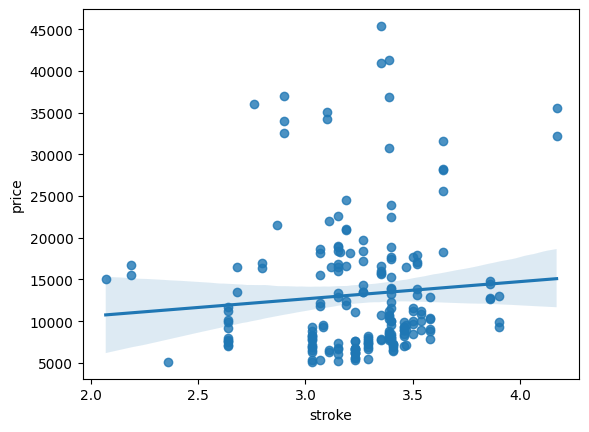

In [2277]:
sns.regplot(x='stroke', y='price', data=df)

<h3>Categorical Variables</h3>

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type 'object' or 'int64'. A good way to visualize categorical variables is by using boxplots.</p>


Let's look at the relationship between 'body-style' and 'price'.


<Axes: xlabel='body-style', ylabel='price'>

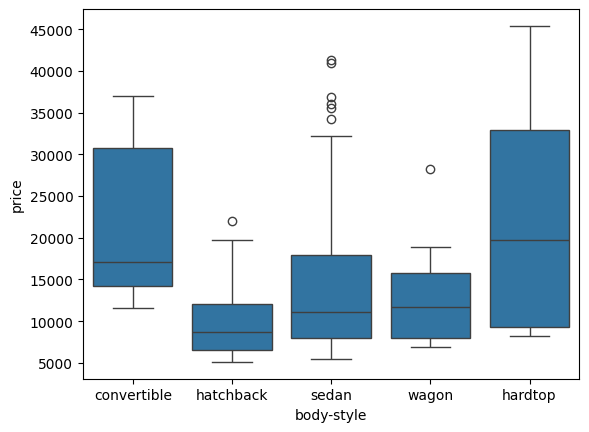

In [2278]:
sns.boxplot(x='body-style', y='price', data=df)

<p>We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price. Let's examine engine 'engine-location' and 'price':</p>


<Axes: xlabel='engine-location', ylabel='price'>

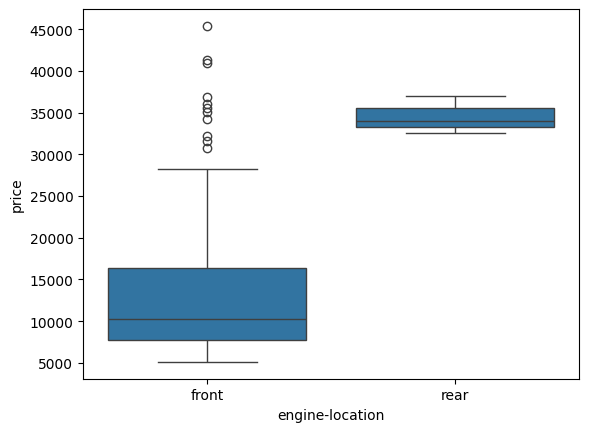

In [2279]:
sns.boxplot(x='engine-location', y='price', data=df)

<p>Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.</p>


Let's examine 'drive-wheels' and 'price'.


<Axes: xlabel='drive-wheels', ylabel='price'>

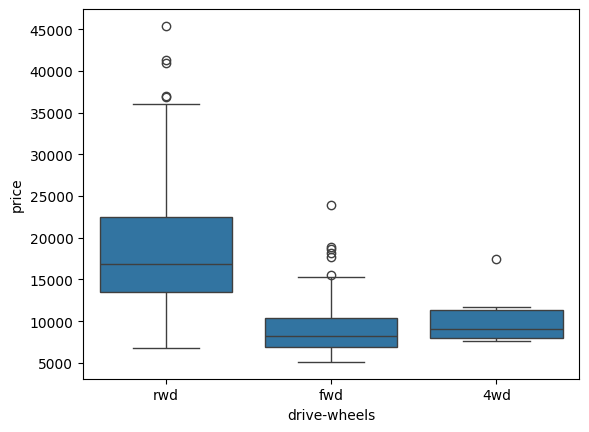

In [2280]:
sns.boxplot(x='drive-wheels', y='price', data=df)

<p>Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.</p>


<h2 id="discriptive_statistics">3. Descriptive Statistical Analysis</h2>


<p>Let's first take a look at the variables by utilizing a description method.</p>

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:

<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>


We can apply the method "describe" as follows:


In [2281]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-km,price,city-km
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256904,10.164279,103.402985,5117.665373,25.179104,8.044957,13207.129353,9.944145
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.319256,4.004965,37.365650,478.113805,6.423220,1.840739,7947.066342,2.534599
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,4.351852,5118.000000,4.795918
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,6.911765,7775.000000,7.833333
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.370000,24.000000,7.833333,10295.000000,9.791667
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,9.400000,16500.000000,12.368421
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,14.687500,45400.000000,18.076923


The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows:


In [2282]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,198,145,157,92,153


<h3>Value Counts</h3>


<p>Value counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column "drive-wheels". Don’t forget the method "value_counts" only works on pandas series, not pandas dataframes. As a result, we only include one bracket <code>df['drive-wheels']</code>, not two brackets <code>df[['drive-wheels']]</code>.</p>


In [2283]:
df['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

We can convert the series to a dataframe as follows:


Let's repeat the above steps but save the results to the dataframe "drive_wheels_counts" and rename the column  'drive-wheels' to 'value_counts'.


In [2284]:
df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


Let's repeat the above steps but save the results to the dataframe "drive_wheels_counts" and rename the column  'drive-wheels' to 'value_counts'.


In [2285]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'count': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


<h2 id="basic_grouping">4. Basics of Grouping</h2>


<p>The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.</p>

<p>For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.</p>


In [2286]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

<p>If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.</p>

<p>We can select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one".</p>


In [2287]:
df_group_one = df[['drive-wheels','body-style', 'price']]
df_group_one.head(10)

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
5,fwd,sedan,15250.0
6,fwd,sedan,17710.0
7,fwd,wagon,18920.0
8,fwd,sedan,23875.0
9,rwd,sedan,16430.0


We can then calculate the average price for each of the different categories of data.


In [2288]:
mean_wheels = df_group_one.groupby('drive-wheels', as_index=False).mean(numeric_only=True)
mean_wheels

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


<p>From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.</p>

<p>You can also group by multiple variables. For example, let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combination of 'drive-wheels' and 'body-style'.</p>


In [2289]:
mean_group_one = df_group_one.groupby(['drive-wheels','body-style'], as_index=False).mean(numeric_only=True)
mean_group_one

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


<p>This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot" to create a pivot table from the groups.</p>

<p>In this case, we will leave the drive-wheels variable as the rows of the table, and pivot body-style to become the columns of the table:</p>


<p>Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well. It should be mentioned that missing data is quite a complex subject and is an entire course on its own.</p>


In [2290]:
pivot_group_one = mean_group_one.pivot(index='drive-wheels', columns='body-style')
pivot_group_one.fillna(0, inplace=True) # fill NaN values with 0
pivot_group_one

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question 4:</h1>

<p>Use the "groupby" function to find the average "price" of each car based on "body-style".</p>
</div>


In [2291]:
df_group_two = df[['body-style', 'price']]
df_group_two.head(10)

,body-style,price
0,convertible,13495.0
1,convertible,16500.0
2,hatchback,16500.0
3,sedan,13950.0
4,sedan,17450.0
5,sedan,15250.0
6,sedan,17710.0
7,wagon,18920.0
8,sedan,23875.0
9,sedan,16430.0


In [2292]:
df_group_two = df_group_two.groupby('body-style', as_index=False).mean(numeric_only=True)
df_group_two

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


<h4>Variables: Drive Wheels and Body Style vs. Price</h4>


Let's use a heat map to visualize the relationship between Body Style vs Price.


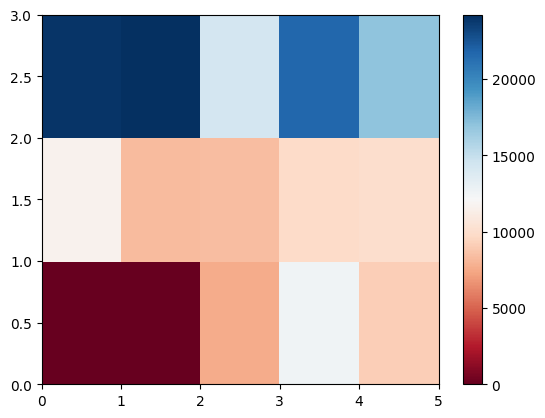

In [2293]:
plt.pcolor(pivot_group_one, cmap='RdBu')
plt.colorbar()
plt.show()

<p>The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' on the vertical and horizontal axis, respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.</p>

<p>The default labels convey no useful information to us. Let's change that:</p>


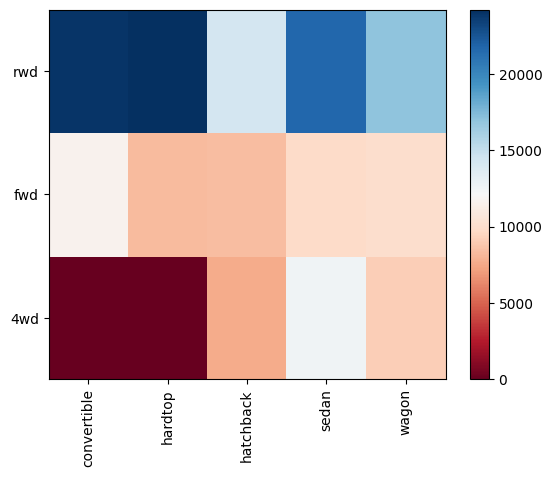

In [2294]:
fig, ax = plt.subplots()
im = ax.pcolor(pivot_group_one, cmap='RdBu')

#label names
row_labels = pivot_group_one.columns.levels[1]
col_labels = pivot_group_one.index

#move ticks and labels to the center
ax.set_xticks(np.arange(pivot_group_one.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(pivot_group_one.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<p>Visualization is very important in data science, and Python visualization packages provide great freedom. We will go more in-depth in a separate Python visualizations course.</p>

<p>The main question we want to answer in this module is, "What are the main characteristics which have the most impact on the car price?".</p>

<p>To get a better measure of the important characteristics, we look at the correlation of these variables with the car price. In other words: how is the car price dependent on this variable?</p>


<h2 id="correlation_causation">5. Correlation and Causation</h2>


<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>


<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>


<p>Pearson Correlation is the default method of the function "corr". Like before, we can calculate the Pearson Correlation of the of the 'int64' or 'float64'  variables.</p>


In [2295]:
df.corr

<bound method DataFrame.corr of      symboling  normalized-losses         make num-of-doors   body-style  \
0            3                122  alfa-romero          two  convertible   
1            3                122  alfa-romero          two  convertible   
2            1                122  alfa-romero          two    hatchback   
3            2                164         audi         four        sedan   
4            2                164         audi         four        sedan   
..         ...                ...          ...          ...          ...   
196         -1                 95        volvo         four        sedan   
197         -1                 95        volvo         four        sedan   
198         -1                 95        volvo         four        sedan   
199         -1                 95        volvo         four        sedan   
200         -1                 95        volvo         four        sedan   

    drive-wheels engine-location  wheel-base    length 

Sometimes we would like to know the significant of the correlation estimate.


<b>P-value</b>

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


We can obtain this information using  "stats" module in the "scipy"  library.


In [2296]:
from scipy import stats

<h3>Wheel-Base vs. Price</h3>


Let's calculate the  Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.


In [2297]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270732887e-20


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).</p>


<h3>Horsepower vs. Price</h3>


Let's calculate the  Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.


In [2298]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8096068016571054  with a P-value of P = 6.273536270650352e-48


<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).</p>


<h3>Length vs. Price</h3>

In [2299]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.690628380448364  with a P-value of P = 8.016477466158871e-30


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).</p>


<h3>Width vs. Price</h3>


In [2300]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.7512653440522674  with a P-value of P = 9.200335510481442e-38


#### Conclusion:

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (\~0.751).


### Curb-Weight vs. Price


In [2301]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8344145257702844  with a P-value of P = 2.189577238893965e-53


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).</p>


<h3>Engine-Size vs. Price</h3>

In [2302]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8723351674455184  with a P-value of P = 9.265491622198793e-64


<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).</p>


<h3>Bore vs. Price</h3>


In [2303]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5431553832626603  with a P-value of P = 8.049189483935319e-17


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).</p>


<h3>City-km vs. Price</h3>


In [2304]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.6865710067844679  with a P-value of P = 2.3211320655675118e-29


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.</p>


<h2 id="anova">6. ANOVA</h2>

<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant our calculated score value is.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.</p>

<h3>Drive Wheels</h3>

<p>Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.</p>

<p>To see if different types of 'drive-wheels' impact  'price', we group the data.</p>



In [2305]:
df_group_three=df_group_one[['drive-wheels', 'price']].groupby(['drive-wheels'])
df_group_three.head()

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
6,fwd,17710.0
7,fwd,18920.0
8,fwd,23875.0
9,rwd,16430.0


<p>This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot" to create a pivot table from the groups.</p>

<p>In this case, we will leave the drive-wheels variable as the rows of the table, and pivot body-style to become the columns of the table:</p>


In [2306]:
df_group_one.head()

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0


We can obtain the values of the method group using the method "get_group".


In [2307]:
df_group_three.get_group(('4wd',))['price'].to_frame().reset_index(drop=True)

,price
0,17450.0
1,7603.0
2,9233.0
3,11259.0
4,8013.0
5,11694.0
6,7898.0
7,8778.0


We can use the function 'f_oneway' in the module 'stats' to obtain the <b>F-test score</b> and <b>P-value</b>.


In [2308]:
# ANOVA
f_val, p_val = stats.f_oneway(df_group_three.get_group(('fwd',))['price'], df_group_three.get_group(('rwd',))['price'], df_group_three.get_group(('4wd',))['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?

Let's examine them separately.


#### fwd and rwd


In [2309]:
f_val, p_val = stats.f_oneway(df_group_three.get_group(('fwd',))['price'], df_group_three.get_group(('rwd',))['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.55331609591107 , P = 2.2355306355677845e-23


#### 4wd and rwd


In [2310]:
f_val, p_val = stats.f_oneway(df_group_three.get_group(('4wd',))['price'], df_group_three.get_group(('rwd',))['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


<h4>4wd and fwd</h4>


In [2311]:
f_val, p_val = stats.f_oneway(df_group_three.get_group(('4wd',))['price'], df_group_three.get_group(('fwd',))['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


<h3>Conclusion: Important Variables</h3>

<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:

<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>

Categorical variables:

<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>



### Thank you for completing this lab!

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
